<a href="https://colab.research.google.com/github/tyrypic/python-pil-labworks/blob/main/variant2_lab2_perlik_k_4_101_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2: «Черно-белое изображение с порогом. Сепия»
**Вариант 2**

**Задание:**
1. Получить черно-белое изображение по порогу.
2. Получить сепия-изображение по глубине.
3. Проанализировать влияние вводимых значений.
4. Повысить контраст с помощью `autocontrast` (разные параметры).
5. Повернуть изображения на 270° против часовой стрелки.

Выполните для минимум четырёх изображений.  
Поместите исходные файлы в папку `images/`, результаты будут сохранены в `output/`.


Сгенерированы 4 асимметричных тестовых изображения: arrow.png, letter_L.png, diagonal_stripes.png, vertical_gradient.png
Введите порог (0–255): 200
Введите глубину сепии: 100
--- first_lab_image: Ч/б (порог=200) ---


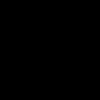

--- first_lab_image: Сепия (глубина=100) ---


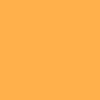

--- first_lab_image: Autocontrast (default) ---


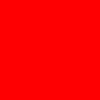

--- first_lab_image: Autocontrast (cutoff=2) ---


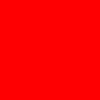

--- first_lab_image: Autocontrast (cutoff=5) ---


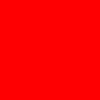

--- first_lab_image: Поворот 270° ---


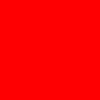

--- arrow: Ч/б (порог=200) ---


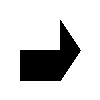

--- arrow: Сепия (глубина=100) ---


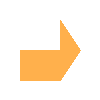

--- arrow: Autocontrast (default) ---


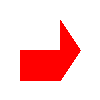

--- arrow: Autocontrast (cutoff=2) ---


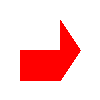

--- arrow: Autocontrast (cutoff=5) ---


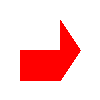

--- arrow: Поворот 270° ---


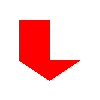

--- vertical_gradient: Ч/б (порог=200) ---


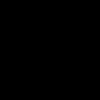

--- vertical_gradient: Сепия (глубина=100) ---


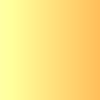

--- vertical_gradient: Autocontrast (default) ---


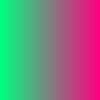

--- vertical_gradient: Autocontrast (cutoff=2) ---


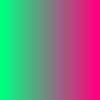

--- vertical_gradient: Autocontrast (cutoff=5) ---


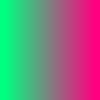

--- vertical_gradient: Поворот 270° ---


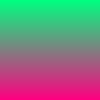

--- diagonal_stripes: Ч/б (порог=200) ---


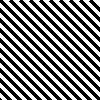

--- diagonal_stripes: Сепия (глубина=100) ---


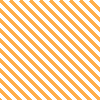

--- diagonal_stripes: Autocontrast (default) ---


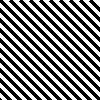

--- diagonal_stripes: Autocontrast (cutoff=2) ---


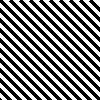

--- diagonal_stripes: Autocontrast (cutoff=5) ---


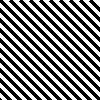

--- diagonal_stripes: Поворот 270° ---


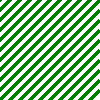

--- letter_L: Ч/б (порог=200) ---


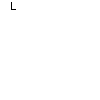

--- letter_L: Сепия (глубина=100) ---


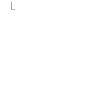

--- letter_L: Autocontrast (default) ---


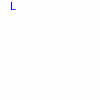

--- letter_L: Autocontrast (cutoff=2) ---


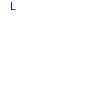

--- letter_L: Autocontrast (cutoff=5) ---


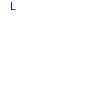

--- letter_L: Поворот 270° ---


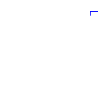

In [ ]:
# from PIL import Image, ImageOps, ImageDraw
# import os


# # Создаем папку для тестовых изображений
# os.makedirs('images', exist_ok=True)

# # 1. Красный квадрат 100×100
# img1 = Image.new('RGB', (100, 100), (255, 0, 0))
# img1.save('images/first_lab_image.png')

# # 2. Зеленый квадрат 100×100
# img2 = Image.new('RGB', (100, 100), (0, 255, 0))
# img2.save('images/photo1.jpg')

# # 3. Синий квадрат 100×100
# img3 = Image.new('RGB', (100, 100), (0, 0, 255))
# img3.save('images/photo2.jpg')

# # 4. Градиент (черно-белый по горизонтали) 100×100
# img4 = Image.new('RGB', (100, 100))
# draw = ImageDraw.Draw(img4)
# for x in range(100):
#     gray = int(255 * x / 99)
#     draw.line([(x, 0), (x, 99)], fill=(gray, gray, gray))
# img4.save('images/photo3.jpg')

# print("Сгенерированы четыре тестовых изображения в папке 'images/'")

from PIL import Image, ImageDraw, ImageFont
import os

# Создаем папку, если нет
os.makedirs('images', exist_ok=True)

# 1. Стрелка
img1 = Image.new('RGB', (100, 100), 'white')
draw1 = ImageDraw.Draw(img1)
# Рисуем стрелку
draw1.polygon([(20, 80), (20, 50), (60, 50), (60, 20), (80, 50), (60, 80)], fill='red')
img1.save('images/arrow.png')

# 2. Буква 'L'
img2 = Image.new('RGB', (100, 100), 'white')
draw2 = ImageDraw.Draw(img2)
try:
    font = ImageFont.truetype("arial.ttf", 80)
except:
    font = ImageFont.load_default()
draw2.text((10, 0), "L", font=font, fill='blue')
img2.save('images/letter_L.png')

# 3. Диагональные полосы
img3 = Image.new('RGB', (100, 100), 'white')
draw3 = ImageDraw.Draw(img3)
for i in range(-100, 100, 10):
    draw3.line([(i, 0), (i + 100, 100)], fill='green', width=3)
img3.save('images/diagonal_stripes.png')

# 4. Вертикальный градиент
img4 = Image.new('RGB', (100, 100))
draw4 = ImageDraw.Draw(img4)
for x in range(100):
    r = int(255 * x / 99)
    g = int(255 * (99 - x) / 99)
    draw4.line([(x, 0), (x, 99)], fill=(r, g, 128))
img4.save('images/vertical_gradient.png')

print("Сгенерированы 4 асимметричных тестовых изображения: arrow.png, letter_L.png, diagonal_stripes.png, vertical_gradient.png")

# Пути к изображениям (замените на свои файлы)
image_paths = [
    'images/first_lab_image.png',
    'images/arrow.png',
    'images/vertical_gradient.png',
    'images/diagonal_stripes.png',
    'images/letter_L.png'
]

output_dir = 'output'
os.makedirs(output_dir, exist_ok=True)

# Функции преобразований
def threshold_bw(img, threshold):
    return img.convert('L')\
              .point(lambda p: 255 if p > threshold else 0)\
              .convert('RGB')

def sepia(img, depth):
    gray = img.convert('L')
    sep = Image.new('RGB', img.size)
    for x in range(img.width):
        for y in range(img.height):
            p = gray.getpixel((x,y))
            r = min(p + 2*depth, 255)
            g = min(p + depth,   255)
            b = p
            sep.putpixel((x,y), (r,g,b))
    return sep

# Ввод параметров
threshold = int(input('Введите порог (0–255): '))
depth     = int(input('Введите глубину сепии: '))

for path in image_paths:
    img  = Image.open(path)
    base = os.path.splitext(os.path.basename(path))[0]

    # 1) Ч/б по порогу
    bw = threshold_bw(img, threshold)
    print(f'--- {base}: Ч/б (порог={threshold}) ---')
    display(bw)
    # при желании сохраняем
    bw.save(f'{output_dir}/{base}_bw_{threshold}.png')

    # 2) Сепия
    sep = sepia(img, depth)
    print(f'--- {base}: Сепия (глубина={depth}) ---')
    display(sep)
    sep.save(f'{output_dir}/{base}_sepia_{depth}.png')

    # 4) Autocontrast
    print(f'--- {base}: Autocontrast (default) ---')
    ac0 = ImageOps.autocontrast(img)
    display(ac0)
    ac0.save(f'{output_dir}/{base}_ac_default.png')

    print(f'--- {base}: Autocontrast (cutoff=2) ---')
    ac2 = ImageOps.autocontrast(img, cutoff=2)
    display(ac2)
    ac2.save(f'{output_dir}/{base}_ac_2.png')

    print(f'--- {base}: Autocontrast (cutoff=5) ---')
    ac5 = ImageOps.autocontrast(img, cutoff=5)
    display(ac5)
    ac5.save(f'{output_dir}/{base}_ac_5.png')

    # 5) Поворот на 270° против часовой стрелки
    print(f'--- {base}: Поворот 270° ---')
    rot = img.transpose(Image.ROTATE_270)
    display(rot)
    rot.save(f'{output_dir}/{base}_rot270.png')

## Лабораторная № 2: «Черно-белое изображение с порогом. Сепия»

1. **Пороговая ч/б сегментация**
   При пороговой сегментации каждый пиксель сравнивается с пороговым значением T. Если его яркость > T, то пиксель становится белым (255), иначе — чёрным (0). Это простой способ выделения объектов на однородном фоне, когда нужные объекты ярче или темнее. Изменяя T, мы регулируем, насколько «жёстко» будет выполняться разделение: при низких порогах останутся только самые яркие детали, при высоких — почти всё изображение станет чёрным.

2. **Сепия-эффект и глубина**
   Сепия — это цветовое тонирование, превращающее картинку в «старинную» коричневатую палитру. Глубина D задаёт, насколько сильно мы смещаем каналы R и G относительно исходной яркости:

   ```python
   R = min(Y + 2·D, 255),  
   G = min(Y + D,   255),  
   B = Y  
   ```

   При большем D картинка становится тёплее, «более желтоватой», а при малом — почти ч/б.

3. **Автоконтраст (autocontrast)**
   Функция `autocontrast` автоматически растягивает гистограмму яркостей так, чтобы самые тёмные и светлые пиксели стали чёрными и белыми, соответственно. Параметр `cutoff` позволяет отрезать крайние проценты пикселей (шум или выбросы) перед растяжением: при `cutoff=0` всё растягивается, при `cutoff=5` игнорируется 5% самых тёмных и 5% самых светлых.

4. **Поворот на 270°**
   Просто меняет ориентацию изображения, что может быть полезно для корректного отображения или для дальнейшего анализа, когда ориентация играет роль.